INFO ----------------------------------------------------------
TIPO = uint8
DIMENSÕES =  (256, 256, 3)
NÚMERO DE BANDAS 3
NÚMERO DE BANDAS =  1
N° DE PIXELS 196608
-----------------------------------------------------------------
ESTATISTICA
INTENSIDADE MÍNIMA =  0
INTENSIDADE MÁXIMA =  255
INTENSIDADE MÉDIA =  128.51839701334634
DESVIO PADRÃO 58.93829401081583
VARIANCIA 3473.722500905369
--------------------------------------------------------------------


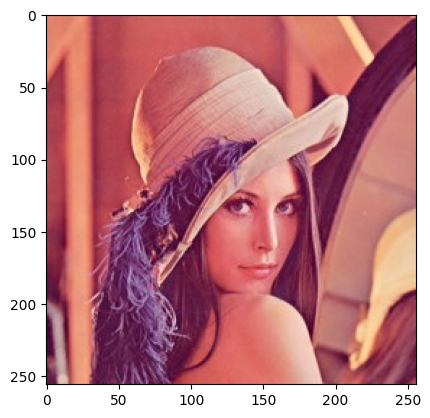

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from imageio.v2 import imread, imwrite 
from copy import deepcopy
img = imread("img/lena.tif")

print('INFO ----------------------------------------------------------')
print('TIPO =', img.dtype) 
print('DIMENSÕES = ', img.shape) 
if len(img.shape)==3:
    print('NÚMERO DE BANDAS', img.shape[2])
else:
    print('NÚMERO DE BANDAS', img.shape[2])
print('NÚMERO DE BANDAS = ', 1) 
print('N° DE PIXELS', img.size)
print('-----------------------------------------------------------------')
print('ESTATISTICA')
print('INTENSIDADE MÍNIMA = ',np.min(img))
print('INTENSIDADE MÁXIMA = ', np.max(img))
print('INTENSIDADE MÉDIA = ', np.mean(img)) 
print('DESVIO PADRÃO', np.std(img)) 
print('VARIANCIA', np.var(img))
print('--------------------------------------------------------------------')

plt.figure()
plt.imshow(img, "gray")

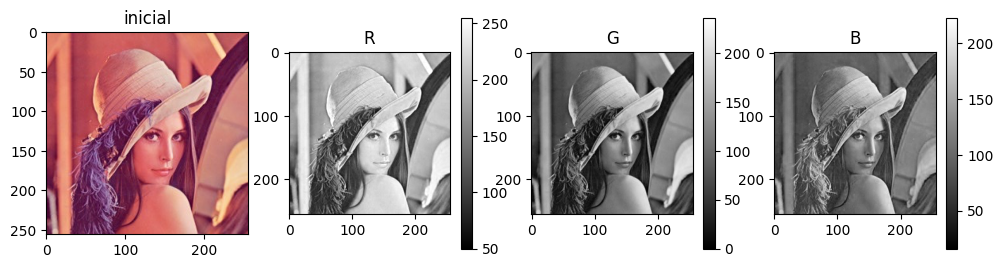

In [4]:
plt.figure(figsize=(12, 3))
plt.subplot(141)
plt.imshow(img)
plt.title('inicial')
plt.subplot(142)
plt.imshow(img[:,:, 0], 'gray')
plt.title('R')
plt.colorbar () 
plt.subplot(143)
plt.imshow(img[:,:, 1], 'gray')
plt.title('G')
plt.colorbar() 
plt.subplot(144)
plt.imshow(img[:,:, 2], 'gray')
plt.title('B')
plt.colorbar()

In [7]:
#GUARDAR AS IMGS
imwrite('img/lena_R.tif', img[:,:, 0])
imwrite('img/lena_G.tif', img[:,:, 1])
imwrite('img/lena_B.tif', img[:,:, 2])

In [8]:
val = img[20,30,0] #pixel (20,30) da primeira img rgb

Text(0.5, 1.0, 'Crop')

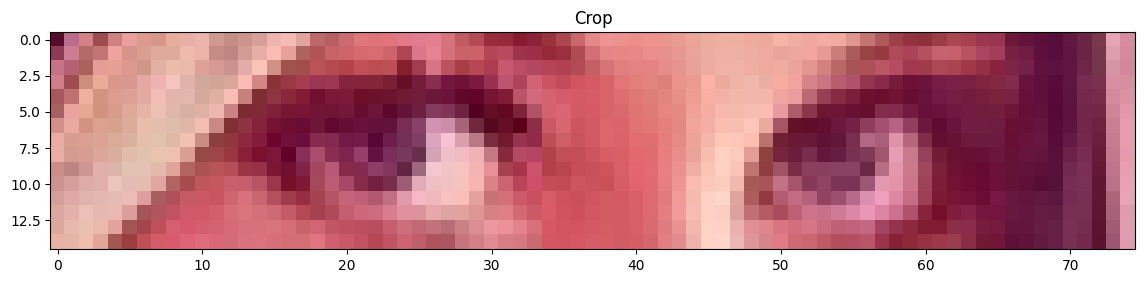

In [39]:

linha_cse = 125
coluna_cse = 110
linha_cid =140
coluna_cid =185
cropimg = img[linha_cse:linha_cid, coluna_cse: coluna_cid] 
plt.figure(figsize=(14, 5))
plt.imshow(cropimg, 'gray')
plt.title('Crop')

Text(0.5, 1.0, 'Incógnita')

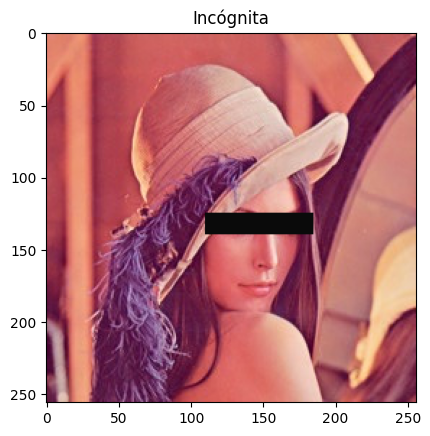

In [40]:

img1 = deepcopy(img)
img1[linha_cse:linha_cid, coluna_cse: coluna_cid] = 10
plt.figure()
plt.imshow(img1, 'gray')
plt.title('Incógnita')

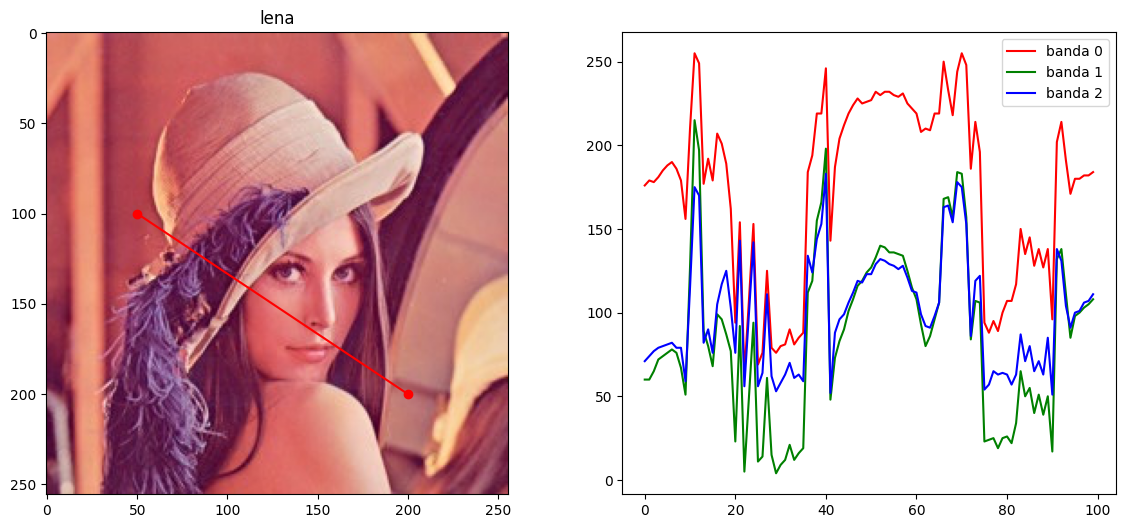

In [42]:
import scipy

y0, x0 = 100, 50
y1, x1 = 200, 200 
num = 100
y, x = np.linspace (y0, y1, num), np.linspace(x0, x1, num)
d = np.vstack((y, x)) 
plt.figure(figsize=(14, 6))
plt.subplot(121); plt.imshow(img, 'gray'); plt.title('lena') 
plt.plot([x0, x1], [y0, y1], 'ro-')

if len(img.shape)==3:
    perfil = []
    cor = ['r', 'g', 'b', 'k']
    plt.subplot(122)
    for i in range(img.shape[2]):
        perfil.append(scipy.ndimage.map_coordinates (img[:, :, i], d)) 
        plt.plot(perfil[-1], cor[i], label='banda ' + str(i))
        plt.legend()
else:
    perfil = scipy.ndimage.map_coordinates (img, d)
    plt.subplot(122); plt.plot(perfil)
    plt.title('Perfil')